## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

## Initialize and Load Data

In [17]:
country = pd.read_csv("dataset/country.csv")
country['Language'] = country['Language'].map({'English':0, 'French':1, 'German':2})
country

## Plot the Data

(-90, 90)

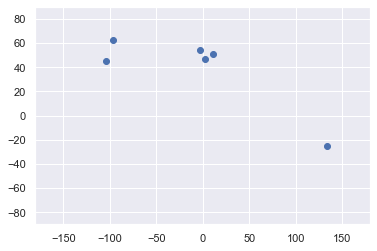

In [3]:
plt.scatter(country['Longitude'], country['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)

## Select the Features

In [4]:
country.iloc[1:2, 0:2]

,Country,Latitude
1,Canada,62.4


In [5]:
country

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [6]:
latitude_and_longitude = country.iloc[:, 1:4]

In [7]:
latitude_and_longitude

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


## Clustering

In [13]:
kmeans = KMeans(3)
kmeans.fit(latitude_and_longitude)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering Results

In [14]:
identified_clusters = kmeans.fit_predict(latitude_and_longitude)
identified_clusters

array([2, 2, 0, 0, 0, 1])

In [15]:
country['Clusters'] = identified_clusters
country

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,2
1,Canada,62.40,-96.80,0,2
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


(-90, 90)

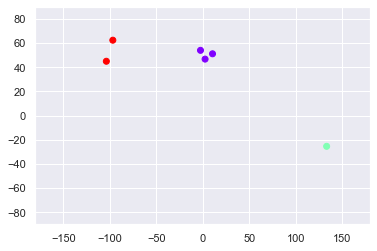

In [16]:
plt.scatter(country['Longitude'], country['Latitude'], c=country['Clusters'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)

## Selecting the Numbers of Clusters with WCSS

In [18]:
kmeans.inertia_

290.10523333333333

In [20]:
wcss = []

for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(latitude_and_longitude)
    wcss_iteration = kmeans.inertia_
    wcss.append(wcss_iteration)

In [33]:
for i in range(0, 6):
    if i != 0:
        print(i + 1, 'clusters: ', wcss[i])
    else:
        print(i + 1, 'cluster: ', wcss[i])

1 cluster:  42605.41356666667
2 clusters:  13208.95812
3 clusters:  290.10523333333333
4 clusters:  113.91233333333332
5 clusters:  39.00624999999998
6 clusters:  0.0


## The Elbow Method

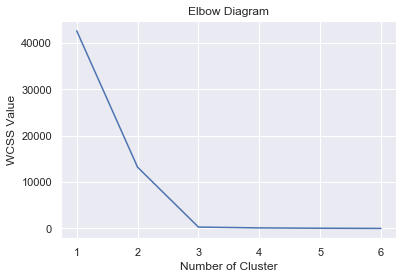

In [32]:
number_of_clusters = range(1, 7)
plt.plot(number_of_clusters, wcss)
plt.title('Elbow Diagram')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS Value')
plt.show()